In [269]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pandas as pd 

In [270]:
from sklearn.datasets import load_files
import numpy as np
DATADIR = "../dataset/fruits-360/Training"
DATADIR_test = "../dataset/fruits-360/Test"

CATEGORIES = ["Apple Braeburn","Apple Crimson Snow","Apple Golden 1","Apple Golden 2","Apple Golden 3",
              "Apple Granny Smith","Apple Pink Lady","Apple Red 1", "Apple Red 2","Apple Red 3","Apple Red Delicious",
              "Apple Red Yellow 1","Apple Red Yellow 2","Banana",
              "Plum","Plum 2", "Plum 3",
             "Pepper Yellow","Pepper Red","Pepper Green",
              "Cherry 1", "Cherry 2", "Cherry Rainier", "Cherry Wax Black", "Cherry Wax Red","Cherry Wax Yellow",
              "Grape Blue", "Grape Pink", "Grape White", "Grape White 2", "Grape White 3", "Grape White 4",
            "Tomato 1","Tomato 2","Tomato 3","Tomato 4","Tomato Yellow","Tomato Maroon",
            "Pear","Pear Abate","Pear Forelle","Pear Kaiser","Pear Monster","Pear Red","Pear Williams",
             "Peach","Peach 2","Peach Flat",
             "Potato Red", "Potato Red Washed","Potato White","Potato Sweet"
             ]

##TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits= {}
for cat in CATEGORIES:
    for typ in TYPES:
        if(cat.startswith(typ)):
            fruits[cat] = typ


In [277]:
def load_dataset(dire):
    lis_files = []
    lis_num_lab =[]
    lis_name_lab = []
    for category in CATEGORIES:
        path = os.path.join(dire,category)
        class_num =TYPES.index(fruits[category])

        class_name = fruits[category]
        for img in tqdm(os.listdir(path)):
               # print("OK: ",os.path.join(path,img) )
                lis_files.append(os.path.join(path,img))
                lis_name_lab.append(class_name)
                lis_num_lab.append(class_num)
                #print("path:  ",os.path.join(path,img)," \n Name: ",class_name," \n Id: ",class_num)

    return pd.DataFrame(list(zip(lis_files,lis_num_lab,lis_name_lab)))

X = load_dataset(DATADIR)
X
#x_train, y_train,target_labels = load_dataset(DATADIR)
#x_test, y_test,_ = load_dataset(DATADIR_test)
#print('Loading complete!')

#print('Training set size : ' , x_train.shape[0])
#print('Testing set size : ', x_test.shape[0])

100%|████████████████████████████████████| 450/450 [00:00<00:00, 225150.52it/s]


,0,1,2
0,../dataset/fruits-360/Training\Apple Braeburn\...,0,Apple
1,../dataset/fruits-360/Training\Apple Braeburn\...,0,Apple
2,../dataset/fruits-360/Training\Apple Braeburn\...,0,Apple
3,../dataset/fruits-360/Training\Apple Braeburn\...,0,Apple
4,../dataset/fruits-360/Training\Apple Braeburn\...,0,Apple
...,...,...,...
27903,../dataset/fruits-360/Training\Potato Sweet\r_...,7,Potato
27904,../dataset/fruits-360/Training\Potato Sweet\r_...,7,Potato
27905,../dataset/fruits-360/Training\Potato Sweet\r_...,7,Potato
27906,../dataset/fruits-360/Training\Potato Sweet\r_...,7,Potato


In [280]:
X.sample(frac=1)

,0,1,2
24791,../dataset/fruits-360/Training\Peach\r_246_100...,9,Peach
9773,../dataset/fruits-360/Training\Pepper Red\r_10...,3,Pepper
10513,../dataset/fruits-360/Training\Cherry 1\169_10...,4,Cherry
25423,../dataset/fruits-360/Training\Peach 2\r_155_1...,9,Peach
21413,../dataset/fruits-360/Training\Pear Abate\323_...,8,Pear
...,...,...,...
5613,../dataset/fruits-360/Training\Apple Red Yello...,0,Apple
9169,../dataset/fruits-360/Training\Pepper Yellow\r...,3,Pepper
12349,../dataset/fruits-360/Training\Cherry Rainier\...,4,Cherry
11404,../dataset/fruits-360/Training\Cherry 2\r2_69_...,4,Cherry


In [232]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    print(files)
    targets = np.array(data['target'])
    print(targets)
    target_labels = np.array(data['target_names'])
    print(target_labels)
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(DATADIR)
x_test, y_test,_ = load_dataset(DATADIR_test)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

['../dataset/fruits-360/Training\\Pear Kaiser\\r_161_100.jpg'
 '../dataset/fruits-360/Training\\Plum 2\\r_110_100.jpg'
 '../dataset/fruits-360/Training\\Banana Lady Finger\\r_79_100.jpg' ...
 '../dataset/fruits-360/Training\\Pepper Green\\78_100.jpg'
 '../dataset/fruits-360/Training\\Pepper Yellow\\209_100.jpg'
 '../dataset/fruits-360/Training\\Apple Granny Smith\\r_188_100.jpg']
[81 95 17 ... 86 88  5]
['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Dates' 'Eggplant'
 'Ginger Root' 'Granadilla' 'Grap

In [263]:
x_train

['../dataset/fruits-360/Training\\Apple Braeburn\\0_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\100_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\101_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\102_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\103_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\104_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\105_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\106_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\107_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\108_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\109_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\10_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\110_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\111_100.jpg',
 '../dataset/fruits-360/Training\\Apple Braeburn\\112_100.jpg',
 '../dataset/fruits-360/Training\\Apple Bra

In [250]:
target_labels

array(['Apple', 'Apple', 'Apple', ..., 'Potato', 'Potato', 'Potato'],
      dtype='<U6')

In [267]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0, random_state=42)


ValueError: test_size=0 should be either positive and smaller than the number of samples 27908 or a float in the (0, 1) range

In [205]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(27908,)
(27908,)
(9335,)
(9335,)


In [206]:
from keras.utils import np_utils
no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]
print(no_of_classes)

10


In [207]:


# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)



Vaildation X :  (7000,)
Vaildation y : (7000, 10)
Test X :  (2335,)
Test y :  (2335, 10)


In [218]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)


Training set shape :  (27908, 32, 32, 3)
Validation set shape :  (7000, 32, 32, 3)
Test set shape :  (2335, 32, 32, 3)
1st training image shape  (32, 32, 3)


In [219]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

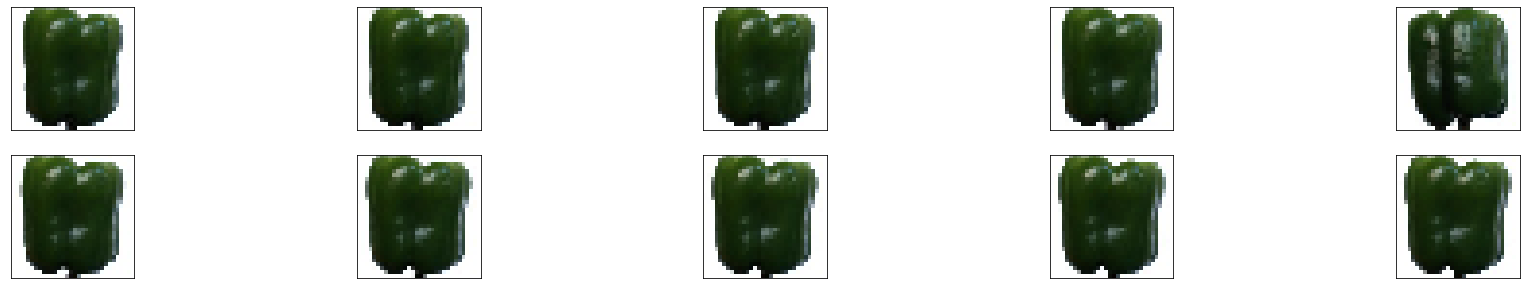

In [222]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [223]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(32,32,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 4, 4, 64)        

In [224]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [225]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
        shuffle=True
                   )

Train on 27908 samples, validate on 7000 samples
Epoch 1/10
 - 12s - loss: 0.7334 - accuracy: 0.7436 - val_loss: 0.2799 - val_accuracy: 0.9186
Epoch 2/10
 - 12s - loss: 0.1009 - accuracy: 0.9672 - val_loss: 0.0515 - val_accuracy: 0.9809
Epoch 3/10
 - 12s - loss: 0.0442 - accuracy: 0.9851 - val_loss: 0.0863 - val_accuracy: 0.9739
Epoch 4/10
 - 12s - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0776 - val_accuracy: 0.9721
Epoch 5/10
 - 12s - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0070 - val_accuracy: 0.9971
Epoch 6/10
 - 12s - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0107 - val_accuracy: 0.9946
Epoch 7/10
 - 12s - loss: 0.0189 - accuracy: 0.9946 - val_loss: 0.0103 - val_accuracy: 0.9953
Epoch 8/10
 - 12s - loss: 0.0161 - accuracy: 0.9955 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 9/10
 - 12s - loss: 0.0168 - accuracy: 0.9956 - val_loss: 0.0096 - val_accuracy: 0.9970
Epoch 10/10
 - 12s - loss: 0.0149 - accuracy: 0.9960 - val_loss: 0.0164 - val_accuracy: 0.9933


In [226]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9708779454231262


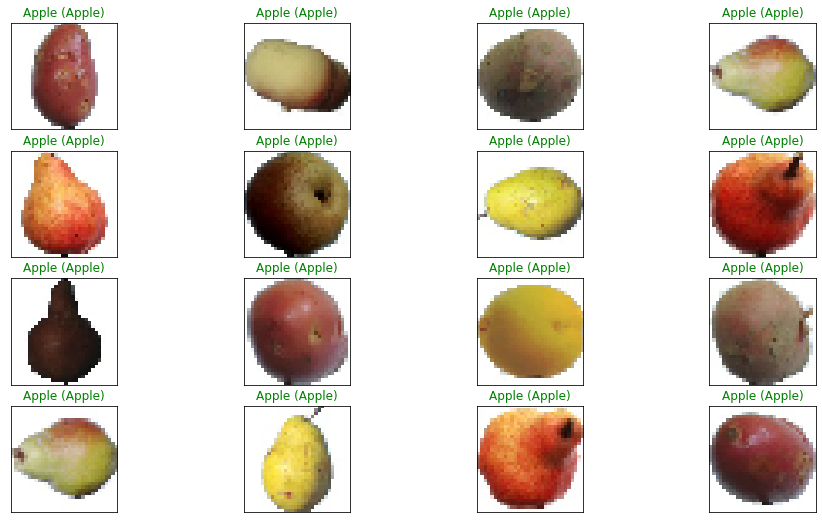

In [231]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

(2335, 32, 32, 3)

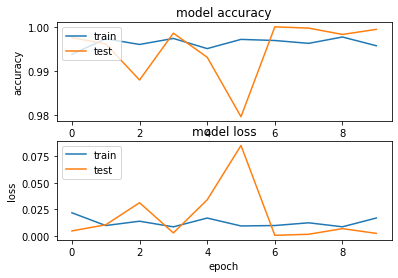

In [177]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [91]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))
            
            
            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
            #
            #!
            #categorical_crossentropy
            #!
            #
            model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

            training_history = model.fit(X,
              y, 
              batch_size=32, epochs=10, validation_split=0.3,     
              validation_data = (X_test, y_test),
              callbacks=[tensorboard])

SyntaxError: unexpected EOF while parsing (<ipython-input-91-c1ccc66ebb1f>, line 41)

In [20]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

Fruits-1-conv-32-nodes-0-dense-29052020-162541
Fruits-2-conv-32-nodes-0-dense-29052020-162541
Fruits-3-conv-32-nodes-0-dense-29052020-162541
Fruits-1-conv-64-nodes-0-dense-29052020-162541
Fruits-2-conv-64-nodes-0-dense-29052020-162541
Fruits-3-conv-64-nodes-0-dense-29052020-162541
Fruits-1-conv-128-nodes-0-dense-29052020-162541
Fruits-2-conv-128-nodes-0-dense-29052020-162541
Fruits-3-conv-128-nodes-0-dense-29052020-162541
Fruits-1-conv-32-nodes-1-dense-29052020-162541
Fruits-2-conv-32-nodes-1-dense-29052020-162541
Fruits-3-conv-32-nodes-1-dense-29052020-162541
Fruits-1-conv-64-nodes-1-dense-29052020-162541
Fruits-2-conv-64-nodes-1-dense-29052020-162541
Fruits-3-conv-64-nodes-1-dense-29052020-162541
Fruits-1-conv-128-nodes-1-dense-29052020-162541
Fruits-2-conv-128-nodes-1-dense-29052020-162541
Fruits-3-conv-128-nodes-1-dense-29052020-162541
Fruits-1-conv-32-nodes-2-dense-29052020-162541
Fruits-2-conv-32-nodes-2-dense-29052020-162541
Fruits-3-conv-32-nodes-2-dense-29052020-162541
Fruits-

In [22]:
print("Average test loss: ", np.average(model.history['loss']))

TypeError: 'History' object is not subscriptable

In [81]:
len(test_data)

8734

In [82]:
len(training_data)

26105

In [89]:
X.shape

(78315, 32, 32, 1)

In [84]:
X_test.shape

(8734, 32, 32, 1)

In [88]:
y.shape

(26105,)

In [86]:
y_test.shape

(8734,)